In [2]:
import numpy as np
from graspy.simulations import sample_edges
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli
import copy
import warnings
from sims_sample_corr import sample_corr

definite simulated P and Rho matrices


In [7]:
p = 0.5
rho = 0.3
dim = 100
P = p * np.ones((dim,dim))
Rho = rho * np.ones((dim,dim))

tests for properties of sample_corr function



mean of revised probabilities of graph2 is  0.4999123737373738


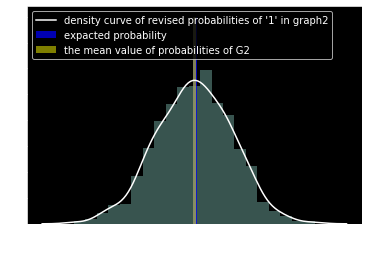

In [10]:
# return prob of G2 without diagnal elements
def test_sample_corr_p(P, Rho, directed=False, loops=False):
    n = np.size(P,1)
    A, B = sample_corr(P, Rho, directed=False, loops=False)
    prob = B.sum()/(n*(n-1))
    return prob

# show the PDF of probability of G2
def density_sample_corr_p(n):
    folder1=[]
    k1=0
    sum1=0
    for i in range (n):
        k1 = test_sample_corr_p(P, Rho, directed=False, loops=False)
        folder1.append(k1)
    folder1.sort()
    m1 = np.mean(folder1)
    print(f'mean of revised probabilities of graph2 is ',m1)

    %matplotlib inline
    x1 = p
    sns.distplot(folder1,axlabel='probability values of p', kde_kws={"label":"density curve of revised probabilities of '1' in graph2","color":"white"})
    plt.bar(x1, 80, width=0.0006, alpha = 0.7, color='blue',label='expacted probability')
    plt.bar(m1, 80, width=0.0006, alpha = 0.5, color='yellow',label='the mean value of probabilities of G2')
    plt.legend(loc='upper left')
    plt.show()
density_sample_corr_p(800)

0.30163333333333286


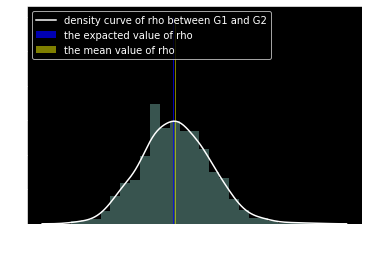

In [17]:
# show the PDF of rho bwtween G1 and G2
def calc_rho(freq):
    folder2 = []
    h=0
    for i in range (freq):
        n = np.size(P,1)
        g1, g2 = sample_corr(P, Rho, directed=False, loops=False)
        k=0 
        r=0
        for i in range(n):
            for j in range(n):
                if g1[i][j] == 1 and g2[i][j] == 1:
                    k+=1
        k = k/(n*(n-1))
        #print(k)
        r = np.abs((k-p**2)/(p-p**2))
        folder2.append(r)
        h += r
    folder2.sort()
    avr = h/freq
    print(avr)

    %matplotlib inline
    x2 = rho
    #plt.xlim((0.45, 0.56))
    #plt.ylim((0, 55))
    sns.distplot(folder2,axlabel='probability values of p', kde_kws={"label":"density curve of rho between G1 and G2","color":"white"})
    plt.bar(x2, 30, width=0.001, alpha = 0.7, color='blue',label='the expacted value of rho')
    plt.bar(avr, 30, width=0.001, alpha = 0.5, color='yellow',label='the mean value of rho')
    plt.legend(loc='upper left')
    plt.show()

calc_rho(800)

In [15]:
# calculate the correlations between two graphs
def test_sample_corr_correlation(n):
    As = []
    Bs = []
    for i in range (n):
        A, B = sample_corr(P, Rho, directed=False, loops=False)
        dim = np.size(P,1)
        A = A.flatten()
        As.append(A)
        B = B.flatten()
        Bs.append(B)
    #print(As)
    G1 = np.mat(As)
    G2 = np.mat(Bs)
    #print(G1)
    #print(G2)
    correlation = np.corrcoef(G1, G2, rowvar=False)
    correlation = correlation.diagonal()
    return correlation
test_sample_corr_correlation(100)

# it will return a 2*dimdim dimention matrix
# and there are lots of nan in correlation matrix
# I don't see the meaning of doing so

array([nan,  1.,  1., ...,  1.,  1., nan])

Expetation of the similarity is 
$p*[p+\rho*(1-p)] + (1-p)*[1-p*(1-\rho)]$.

If we output the simulated results from this function, 

we can see the results is close to what we expect:

In [20]:
p = 0.5
rho = 0.3
dim = 100
P = p * np.ones((dim,dim))
Rho = rho * np.ones((dim,dim))
def test_sample_corr_same(n):
    S = []
    judge = []
    for i in range(n):
        A, B = sample_corr(P, Rho, directed=False, loops=False)
        judge = (A == B)
        #print(judge)
        judge.astype(int)
        #print(judge)
        S.append(judge)
    similarity = (np.sum(S)-dim*n)/(n*dim*(dim-1))
    return similarity
test_sample_corr_same(1000)

0.6500533333333334